In [ ]:
#Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random
from collections import Counter

# Mounting the drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analysis

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv") # Reading the dataset

In [ ]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
print(data.shape) 
print(data.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

**This suggests that we have 284807 rows and 31 features. From data.info() we observe that there are no null values and no object data type. Thus we don't have to perform any encoding or imputing.**

In [ ]:
#Observing only the fraud data

fraud = data[data['Class'] == 1] 
print(fraud)

            Time        V1        V2  ...       V28  Amount  Class
541        406.0 -2.312227  1.951992  ... -0.143276    0.00      1
623        472.0 -3.043541 -3.157307  ...  0.035764  529.00      1
4920      4462.0 -2.303350  1.759247  ... -0.153029  239.93      1
6108      6986.0 -4.397974  1.358367  ...  0.849573   59.00      1
6329      7519.0  1.234235  3.019740  ...  0.146793    1.00      1
...          ...       ...       ...  ...       ...     ...    ...
279863  169142.0 -1.927883  1.125653  ...  0.147968  390.00      1
280143  169347.0  1.378559  1.289381  ...  0.186637    0.76      1
280149  169351.0 -0.676143  1.126366  ...  0.194361   77.89      1
281144  169966.0 -3.113832  0.585864  ... -0.253700  245.00      1
281674  170348.0  1.991976  0.158476  ... -0.015309   42.53      1

[492 rows x 31 columns]


In [ ]:
#Observing only the genuine data

genuine = data[data['Class'] == 0] 
print(genuine)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284315 rows x 31 columns]


In [ ]:
per_fraud=(len(fraud)/float(data.shape[0]))*100
print('Percent of fraud data :{}'.format(per_fraud)) 
print('Fraud Cases: {}'.format(len(fraud))) 
print('Genuine Transactions: {}'.format(len(genuine))) 

Percent of fraud data :0.1727485630620034
Fraud Cases: 492
Genuine Transactions: 284315


**Only 0.17% of the entire data belongs to Fraud. Thus this data set is highly imbalanced.**

In [ ]:
fraud.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe() 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**You can see that the average amount spent in case of the Fraudulent transaction in more as compared to the valid transactions**

# Data Visualization

In [ ]:
#Getting the correlation matrix
corr = data.corr() 
print(corr)


            Time            V1            V2  ...           V28    Amount     Class
Time    1.000000  1.173963e-01 -1.059333e-02  ... -9.412688e-03 -0.010596 -0.012323
V1      0.117396  1.000000e+00  4.697350e-17  ...  9.820892e-16 -0.227709 -0.101347
V2     -0.010593  4.697350e-17  1.000000e+00  ... -3.676415e-16 -0.531409  0.091289
V3     -0.419618 -1.424390e-15  2.512175e-16  ...  7.726948e-16 -0.210880 -0.192961
V4     -0.105260  1.755316e-17 -1.126388e-16  ... -5.863664e-17  0.098732  0.133447
V5      0.173072  6.391162e-17 -2.039868e-16  ... -3.299167e-16 -0.386356 -0.094974
V6     -0.063016  2.398071e-16  5.024680e-16  ...  4.813155e-16  0.215981 -0.043643
V7      0.084714  1.991550e-15  3.966486e-16  ... -6.836764e-17  0.397311 -0.187257
V8     -0.036949 -9.490675e-17 -4.413984e-17  ... -4.484325e-16 -0.103079  0.019875
V9     -0.008660  2.169581e-16 -5.728718e-17  ...  9.146779e-16 -0.044246 -0.097733
V10     0.030617  7.433820e-17 -4.782388e-16  ... -1.515934e-16 -0.101502 -0

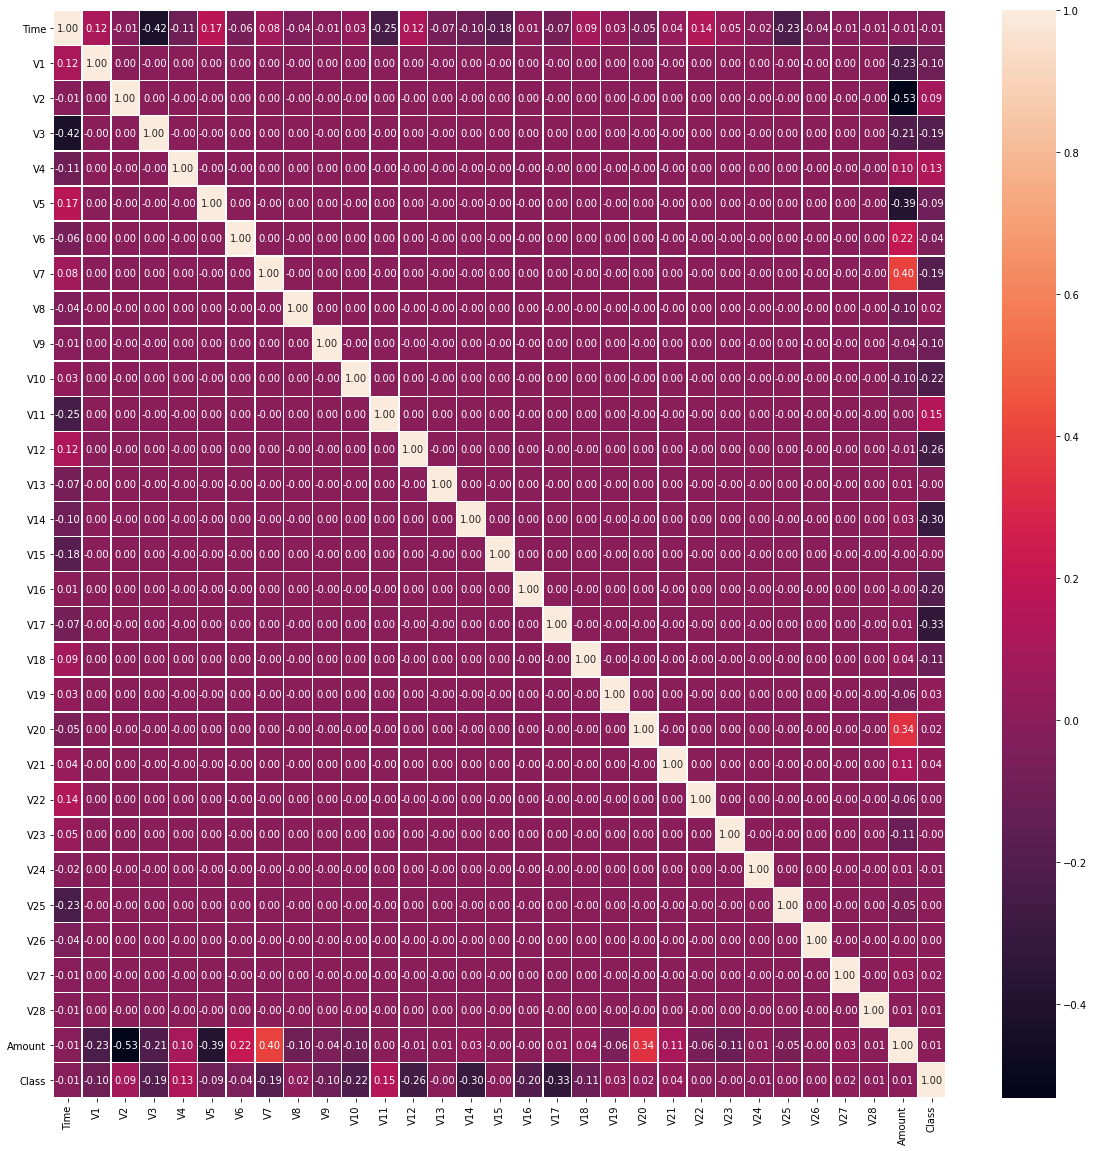

In [ ]:
#Plotting the heatmap

fig = plt.figure(figsize = (20, 20)) 
sns.heatmap(corr, annot=True, linewidths=0.5, fmt= '.2f') 
plt.show() 

**So we observe that in most of the cases ther isn't much correlation. However in some cases like between Amount and V2 there exists a high negative correlation. Similarly between Amount and V7 a high positive correlation exists**

# Splitting the data into X and Y

In [ ]:
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 

print(X.shape) 
print(Y.shape) 

(284807, 30)
(284807,)


**Here the target feature is to detect if the transaction is fradulent or not. That is why we put the column Class as Y and the rest of the data goes into X.**

# Splitting the data into train and test

In [ ]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets 
x_Train, x_Test, y_Train, y_Test = train_test_split( X,Y,test_size = 0.2) 

**Let's try to implement different models and compare the results**

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() #create the object of the model
lr = lr.fit(x_Train,y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score

y_pred=lr.predict(x_Test)
act = accuracy_score(y_Test,y_pred)
print('Test Accuracy is: ',(act*100))
p = precision_score(y_Test,y_pred)
print('Test Precision is: ',(p*100))
r = recall_score(y_Test,y_pred)
print('Test Recall is: ',(r*100))
f = f1_score(y_Test,y_pred)
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  99.87886661282961
Test Precision is:  67.0103092783505
Test Recall is:  63.725490196078425
Test F1 Score is:  65.32663316582914


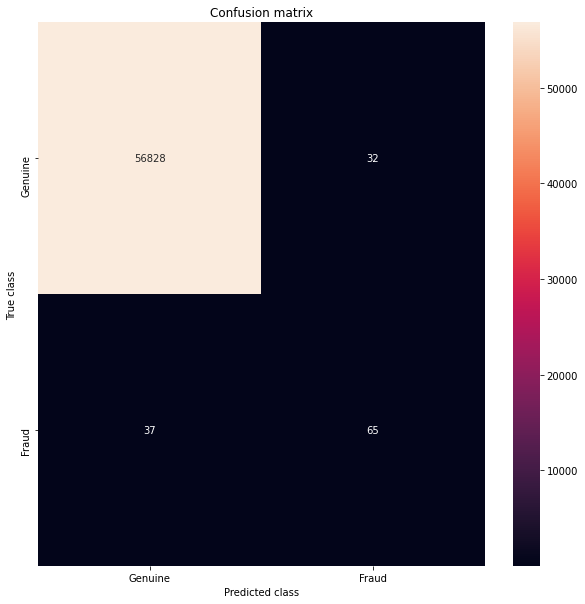

In [ ]:
LABELS = ['Genuine', 'Fraud'] 
conf_matrix = confusion_matrix(y_Test, y_pred) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt=dt.fit(x_Train, y_Train)

In [ ]:
y_pred=dt.predict(x_Test)
act = accuracy_score(y_Test,y_pred)
print('Test Accuracy is: ',(act*100))
p = precision_score(y_Test,y_pred)
print('Test Precision is: ',(p*100))
r = recall_score(y_Test,y_pred)
print('Test Recall is: ',(r*100))
f = f1_score(y_Test,y_pred)
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  99.90344440153085
Test Precision is:  72.81553398058253
Test Recall is:  73.52941176470588
Test F1 Score is:  73.17073170731707


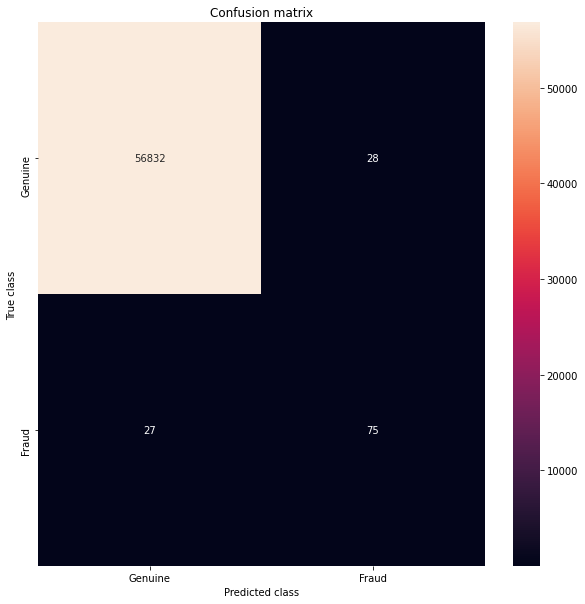

In [ ]:
LABELS = ['Genuine', 'Fraud'] 
conf_matrix = confusion_matrix(y_Test, y_pred) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(x_Train,y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(x_Test)
act = accuracy_score(y_Test,y_pred)
print('Test Accuracy is: ',(act*100))
p = precision_score(y_Test,y_pred)
print('Test Precision is: ',(p*100))
r = recall_score(y_Test,y_pred)
print('Test Recall is: ',(r*100))
f = f1_score(y_Test,y_pred)
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  99.9438221972543
Test Precision is:  92.6829268292683
Test Recall is:  74.50980392156863
Test F1 Score is:  82.60869565217392


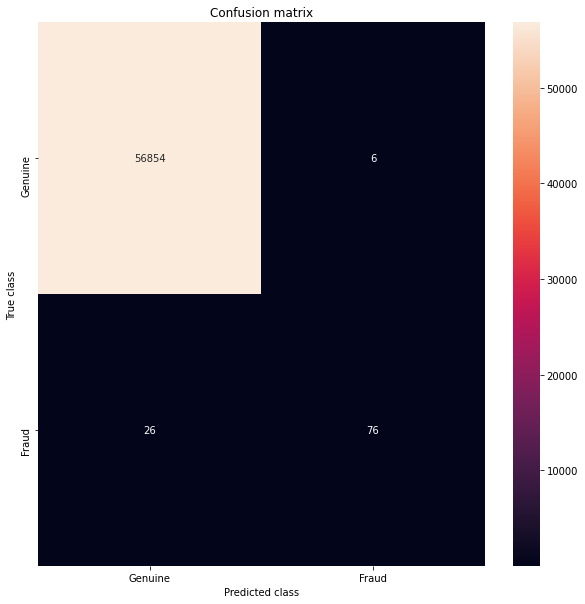

In [ ]:
LABELS = ['Genuine', 'Fraud'] 
conf_matrix = confusion_matrix(y_Test, y_pred) 
plt.figure(figsize =(10, 10)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

**Now the issue here is that the data is highly imbalanced.That is why although we are getting a pretty high accuracy score the precision, recall and f1 score achieved is not good. Accuracy is not a good measure in such cases of imabalnced dataset. So let's adopt 2 approaches - Over Sampling and Under Sampling to deal with the problem of imbalanced dataset**

##**Under Sampling**

**Here we will randomly select the same number of datapoints from the majority class as there are in the minority class thus making both of them equal.**

In [ ]:
fraud_index = list(fraud.index)
genuine_index= list(genuine.index)

random_genuine_ind = random.sample(genuine_index, len(fraud_index)) # Randomly selecting datapoints from the majority class

under_sample_index=fraud_index+random_genuine_ind 

under_sample_data = data.iloc[under_sample_index, :] #Extracting the specified rows and creating the undersampled dataset

#Splitting the undersampled dataset into X and Y
X_undersample = under_sample_data.drop(['Class'], axis = 1) 
Y_undersample = under_sample_data["Class"] 



In [ ]:
x_Train, x_Test, y_Train, y_Test = train_test_split( X_undersample,Y_undersample,test_size = 0.2) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(x_Train,y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(x_Test)
act = accuracy_score(y_Test,y_pred)
print('Test Accuracy is: ',(act*100))
p = precision_score(y_Test,y_pred)
print('Test Precision is: ',(p*100))
r = recall_score(y_Test,y_pred)
print('Test Recall is: ',(r*100))
f = f1_score(y_Test,y_pred)
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  94.41624365482234
Test Precision is:  97.77777777777777
Test Recall is:  90.72164948453609
Test F1 Score is:  94.11764705882352


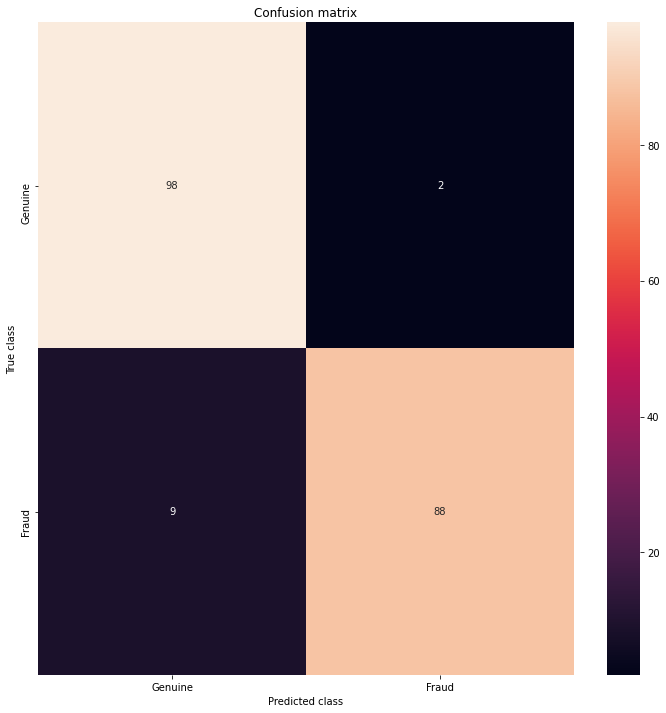

In [ ]:
LABELS = ['Genuine', 'Fraud'] 
conf_matrix = confusion_matrix(y_Test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

**Here the precsion, recall and F1-score has improved a lot**

**However the problem with this approach is that we are randomly leaving out a lot of datapoints that could have contributed towards my model training. So now we will adopt another appproach**

##**Over Sampling : SMOTE (Synthetic Minority Oversampling Technique)**

**Here new examples are synthesized from the minority class.**

In [ ]:
from imblearn.over_sampling import SMOTE
X_resample, Y_resample = SMOTE().fit_sample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resample.shape

(568630, 30)

**Check the number of data points is 568630. In the majority class i.e Genuine transactions 284315 data points and now for the minority class also i.e Fraud transactions 284315 data points are synthesized from the existing points using SMOTE. Thus the dataset has 568630 datapoints**

In [ ]:
counter = Counter(Y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [ ]:
x_Train, x_Test, y_Train, y_Test = train_test_split( X_resample,Y_resample,test_size = 0.2) #Splitting the dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(x_Train,y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(x_Test)
act = accuracy_score(y_Test,y_pred)
print('Test Accuracy is: ',(act*100))
p = precision_score(y_Test,y_pred)
print('Test Precision is: ',(p*100))
r = recall_score(y_Test,y_pred)
print('Test Recall is: ',(r*100))
f = f1_score(y_Test,y_pred)
print('Test F1 Score is: ',(f*100))

Test Accuracy is:  99.99120693596892
Test Precision is:  99.98416886543535
Test Recall is:  99.99824073748285
Test F1 Score is:  99.9912043063716


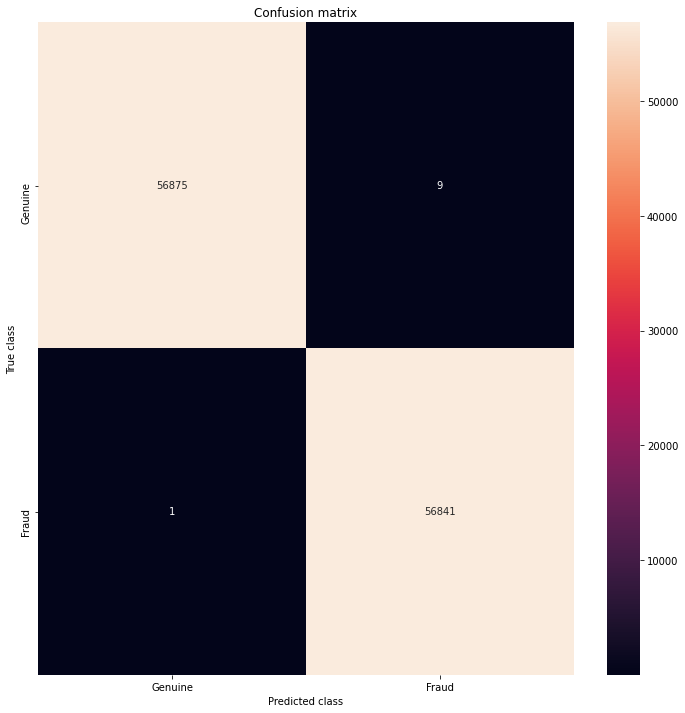

In [ ]:
LABELS = ['Genuine', 'Fraud'] 
conf_matrix = confusion_matrix(y_Test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

**Here we are getting the best precision, recall and f1-score.The Confusion Matrix is almost perfect as well.**